# Corex Topic Modeling
The purpose of this notebook is to utilize Corex to run topic modeling on the dataset.

Importing packages, including Corex.

In [3]:
import pandas as pd
import numpy as np
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [4]:
pwd

'/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis'

Picking in Data:

In [5]:
with open('Data/cleaned_string_df.pickle','rb') as read_file:
    new_df = pickle.load(read_file)

In [6]:
new_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,3,n/a,one minute response
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,4,n/a,one minute response sir


In [7]:
new_df.shape

(76452, 10)

## Count Vectorizer

Utilizing count vectorizer to vectorize my corpus for Corex.

In [25]:
stop = ['presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute', 'republican', 'democrat', 'administration', 'question', 'evening', 'congress', 'vote', 'senate', 'house']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words=stop, binary=True)

In [27]:
X = new_df[new_df.line_length >= 30]['string']
cv_model = count_vectorizer.fit_transform(X)

In [28]:
words = list(np.asarray(count_vectorizer.get_feature_names()))

Fitting Corex:

In [31]:
topic_model = ct.Corex(n_hidden=10, words=words, seed=1)
topic_model.fit(cv_model, words=words, docs=X)

Printing Topics:

In [32]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics, 1):
    topic_words,_ = zip(*topic)
    print('Topic {} Key Words: '.format(n) + ','.join(topic_words))
    print('\n')

Topic 1 Key Words: war,iraq,iran,military,troop,nuclear,world,ally,weapon,force


Topic 2 Key Words: tax,cut,billion,budget,rate,dollar,money,spending,percent,trillion


Topic 3 Key Words: energy,gas,oil,fuel,clean,future,solar,fossil,area,natural


Topic 4 Key Words: health,care,insurance,education,school,job,pay,family,income,class


Topic 5 Key Words: law,life,justice,woman,black,abortion,crime,immigrant,immigration,criminal


Topic 6 Key Words: year,last,four,eight,time,two,next,ago,tonight,six


Topic 7 Key Words: think,kind,believe,thing,important,leadership,done,great,must,way


Topic 8 Key Words: court,united,supreme,state,would,na,gon,decision,general,answer


Topic 9 Key Words: say,let,assault,fact,though,ban,supported,even,regard,show


Topic 10 Key Words: bill,dole,reform,doctor,ought,passed,little,pas,patient,opposed




Top Docs:

In [36]:
topic_model.get_top_docs(topic=1, n_docs=2)

[('would save lot money managed care giving option preventive care lowering inflation rate price paying provider without kind big premium increase outof pocket cost budget vetoed would provide give u year medicare going social security bipartisan group look save baby boomer retire ought pas budget put year right away one worry',
  0.0),
 ('kraft – think record put – way – way think satisfies american since depth recession added four million job im importantly consumer confidence surveyed reputable organization university michigan highest since word growing public confidence strength economy mean industrial activity mean reduction uhh – unemployment mean increased hire mean increased employment ’ pause economist regardless political philosophy – indicate pause month two healthy could honestly sustained percent rate growth first quarter – ’ like point well united state ’ economic recovery recession ago well ahead economic recovery major free industrial nation world today ’ ahead western 

Document-Topic Assignments:

In [38]:
predictions = pd.DataFrame(topic_model.predict(cv_model), columns=['topic'+str(i) for i in range(10)])
predictions.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,False,False,True,False,False,True,False,True,False,True
1,False,False,True,False,True,False,False,True,False,True
2,False,True,False,False,False,False,True,False,False,False


Plots:

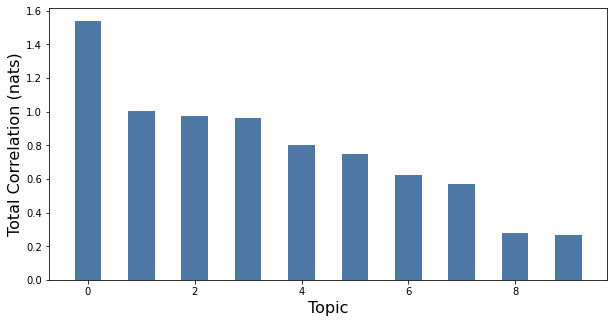

In [39]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

Looks like there may be an elbow after 4 or 6 topics.

### Trying Anchors:
For anchors, I'll use some words that I know are in the main topics:
- Education: school, education, teacher
- Economy/Taxes: tax, cut, percent, income, pay
- War/Foreign Policy: military, war
- Healthcare: health, care, insurance, doctor

In [41]:
topic_model = ct.Corex(n_hidden=6, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(cv_model, words=words, docs=X, 
                anchors=[['school', 'education', 'teacher'], 
                         ['tax', 'cut', 'percent', 'income', 'pay'], 
                         ['military', 'war'], 
                         ['health', 'care', 'insurance', 'doctor'],
                         [], 
                         []], anchor_strength=10)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: school,education,teacher,child,kid,college,student,parent,public,high
1: tax,percent,cut,pay,income,rate,budget,code,plan,increase
2: war,military,iraq,troop,force,ii,cold,peace,defense,vietnam
3: care,health,insurance,doctor,cost,affordable,medicare,medical,universal,patient
4: nuclear,iran,world,united,weapon,ally,state,soviet,syria,foreign
5: think,one,time,thank,made,tonight,first,believe,democratic,answer


# TF-IDF:

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
stop = ['presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute']

In [44]:
vectorizer = TfidfVectorizer(stop_words=stop)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [45]:
X = new_df[new_df.line_length >= 30]['string']
tfi_model = vectorizer.fit_transform(X)

In [46]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [47]:
tf_term_document_matrix.shape

(10278, 15947)

In [48]:
words = list(np.asarray(vectorizer.get_feature_names()))

Fitting Corex:

In [50]:
topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(tfi_model, words=words, docs=X)

Printing Topics:

In [51]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics, 1):
    topic_words,_ = zip(*topic)
    print('Topic {} Key Words: '.format(n) + ','.join(topic_words))
    print('\n')

Topic 1 Key Words: iran,nuclear,iraq,tax,troop,war,weapon,syria,ally,isi


Topic 2 Key Words: question,news,correspondent,format,thank,tonight,rebuttal,second,cnn,answer


Topic 3 Key Words: energy,oil,gas,fuel,coal,solar,wind,efficiency,fossil,natural


Topic 4 Key Words: aaron,polarize,poking,poison,pointed,poet,pocatello,plutonium,plus,plugging


Topic 5 Key Words: blurb,voiced,abolition,pride,preventing,pretending,presumptively,presumption,presume,prestigious


Topic 6 Key Words: abbottabad,preselected,preschooler,pres,prepares,preparer,preparation,prepaid,prentiss,prefers


